In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2024-04-12 14:38:31.395766: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 14:38:33.749959: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [17]:
#Define image dimensions and batch size
img_height, img_width = 32, 32
batch_size = 32

# Define the directory where the images are stored
data_dir = "./asl_dataset"

In [18]:
# Create an ImageGDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

In [19]:
# Load and iterate the training dataset
train_dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

#Load and iterate the validation dataset
validation_dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 1452 images belonging to 26 classes.
Found 363 images belonging to 26 classes.


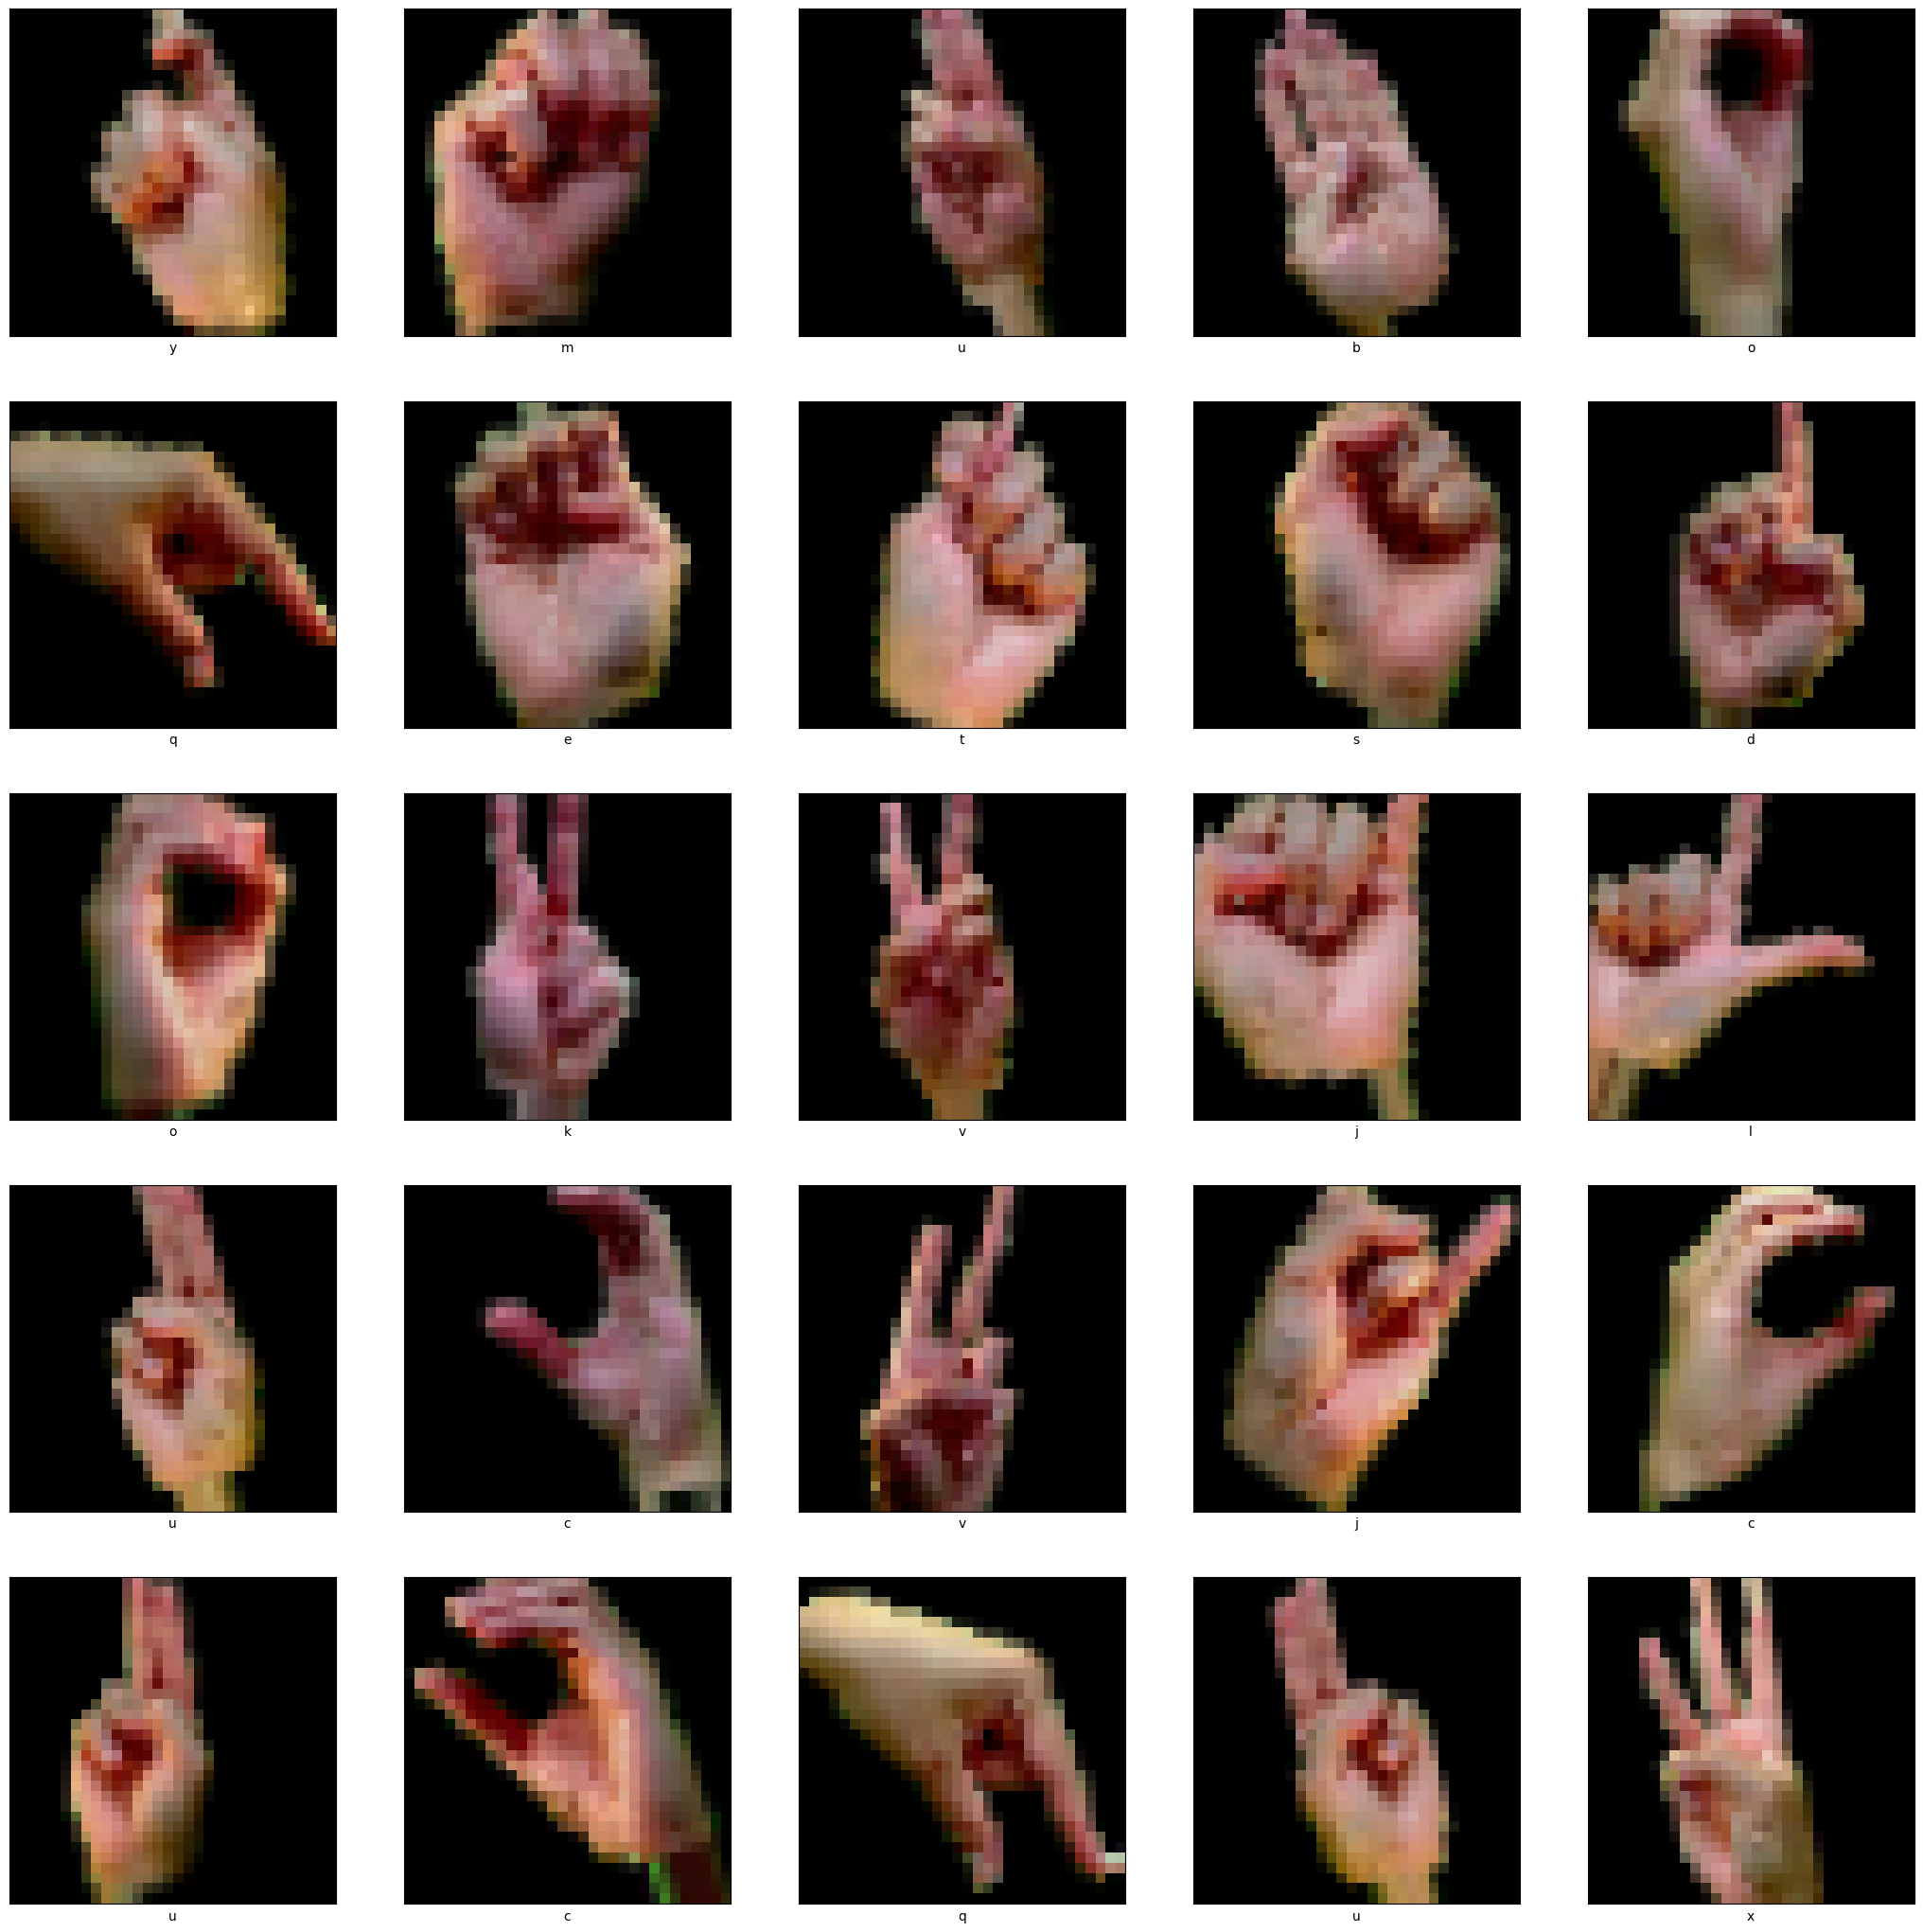

In [20]:
# Get a batch of images and labels from the train_dataset
images, labels = next(train_dataset)

# Define class names
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z']

# Get the number of images to display, which is the minimum between 25 and the actual number of images in the batch
num_images = min(25, images.shape[0])

plt.figure(figsize=(26, 26))
for i in range(num_images):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].astype('uint8'))  # Convert the image type to uint8
    plt.xlabel(class_names[int(labels[i])])  # Convert the label to int before using it as index
plt.show()

In [21]:
# Create the convolution base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add dense layer on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,610 (482.85 KB)

 Trainable params: 123,610 (482.85 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile and train the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
# Train the model

history = model.fit(
    train_dataset,
    steps_per_epoch = train_dataset.samples // batch_size,
    validation_data = validation_dataset, 
    validation_steps = validation_dataset.samples // batch_size,
    epochs = 70)

Epoch 1/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.8081 - loss: 0.5259 - val_accuracy: 0.7045 - val_loss: 0.8771
Epoch 2/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.7812 - loss: 0.6149 - val_accuracy: 0.8182 - val_loss: 0.7167
Epoch 3/70


2024-04-12 14:56:51.542905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:56:51.560707: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.8098 - loss: 0.4939 - val_accuracy: 0.7528 - val_loss: 0.7446
Epoch 4/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.7812 - loss: 0.5791 - val_accuracy: 0.8182 - val_loss: 0.4696
Epoch 5/70


2024-04-12 14:56:55.628008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:56:55.641884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8151 - loss: 0.4838 - val_accuracy: 0.8040 - val_loss: 0.5307
Epoch 6/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.7500 - loss: 0.5553 - val_accuracy: 0.9091 - val_loss: 0.3290
Epoch 7/70


2024-04-12 14:56:59.463717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:56:59.476586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8454 - loss: 0.4041 - val_accuracy: 0.7557 - val_loss: 0.6847
Epoch 8/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.7812 - loss: 0.8002 - val_accuracy: 0.5455 - val_loss: 0.7789
Epoch 9/70


2024-04-12 14:57:03.174904: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:03.186112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8120 - loss: 0.5736 - val_accuracy: 0.7869 - val_loss: 0.6223
Epoch 10/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8750 - loss: 0.4235 - val_accuracy: 0.8182 - val_loss: 0.3355
Epoch 11/70


2024-04-12 14:57:07.201895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:07.218693: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8125 - loss: 0.4851 - val_accuracy: 0.7812 - val_loss: 0.6295
Epoch 12/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9062 - loss: 0.3506 - val_accuracy: 1.0000 - val_loss: 0.0872
Epoch 13/70


2024-04-12 14:57:10.970995: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:10.991054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8481 - loss: 0.4200 - val_accuracy: 0.8040 - val_loss: 0.6596
Epoch 14/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.8750 - loss: 0.3328 - val_accuracy: 1.0000 - val_loss: 0.2835
Epoch 15/70


2024-04-12 14:57:14.894233: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:14.907076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8504 - loss: 0.4082 - val_accuracy: 0.8125 - val_loss: 0.6000
Epoch 16/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.7500 - loss: 0.7488 - val_accuracy: 0.7273 - val_loss: 0.8322
Epoch 17/70


2024-04-12 14:57:18.787258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:18.800249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8702 - loss: 0.3654 - val_accuracy: 0.8068 - val_loss: 0.5681
Epoch 18/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9375 - loss: 0.2841 - val_accuracy: 0.8182 - val_loss: 1.0723
Epoch 19/70


2024-04-12 14:57:22.692178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:22.707345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8677 - loss: 0.3660 - val_accuracy: 0.8210 - val_loss: 0.5257
Epoch 20/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.8750 - loss: 0.2900 - val_accuracy: 0.7273 - val_loss: 0.5869
Epoch 21/70


2024-04-12 14:57:26.580352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:26.596406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.8594 - loss: 0.4111 - val_accuracy: 0.8239 - val_loss: 0.5414
Epoch 22/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9375 - loss: 0.2419 - val_accuracy: 0.8182 - val_loss: 0.4289
Epoch 23/70


2024-04-12 14:57:30.615695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:30.628390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8907 - loss: 0.3190 - val_accuracy: 0.8153 - val_loss: 0.5335
Epoch 24/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.8438 - loss: 0.4018 - val_accuracy: 0.6364 - val_loss: 1.2893
Epoch 25/70


2024-04-12 14:57:34.525533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:34.538084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8420 - loss: 0.4212 - val_accuracy: 0.8040 - val_loss: 0.5658
Epoch 26/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9688 - loss: 0.1710 - val_accuracy: 0.7273 - val_loss: 1.1080
Epoch 27/70


2024-04-12 14:57:38.414079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:38.424288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8977 - loss: 0.3099 - val_accuracy: 0.8324 - val_loss: 0.6106
Epoch 28/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.9062 - loss: 0.2760 - val_accuracy: 0.9091 - val_loss: 0.2491
Epoch 29/70


2024-04-12 14:57:42.456388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:42.471738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8754 - loss: 0.3460 - val_accuracy: 0.8466 - val_loss: 0.5082
Epoch 30/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9375 - loss: 0.3943 - val_accuracy: 0.9091 - val_loss: 0.1411
Epoch 31/70


2024-04-12 14:57:46.368649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:46.384643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8887 - loss: 0.3237 - val_accuracy: 0.8409 - val_loss: 0.6938
Epoch 32/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.7500 - loss: 0.5658 - val_accuracy: 0.6364 - val_loss: 0.8439
Epoch 33/70


2024-04-12 14:57:50.210825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:50.224715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8920 - loss: 0.2996 - val_accuracy: 0.7898 - val_loss: 0.7432
Epoch 34/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9062 - loss: 0.2877 - val_accuracy: 0.9091 - val_loss: 0.2544
Epoch 35/70


2024-04-12 14:57:54.125222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:54.140471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8890 - loss: 0.2831 - val_accuracy: 0.8153 - val_loss: 0.5690
Epoch 36/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.9688 - loss: 0.1398 - val_accuracy: 0.9091 - val_loss: 0.1507
Epoch 37/70


2024-04-12 14:57:57.844222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:57:57.861591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9001 - loss: 0.2438 - val_accuracy: 0.8267 - val_loss: 0.5890
Epoch 38/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.9375 - loss: 0.1571 - val_accuracy: 0.9091 - val_loss: 0.3252
Epoch 39/70


2024-04-12 14:58:01.724255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:01.738785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8609 - loss: 0.3888 - val_accuracy: 0.8381 - val_loss: 0.5033
Epoch 40/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.7812 - loss: 0.4405 - val_accuracy: 0.9091 - val_loss: 0.3851
Epoch 41/70


2024-04-12 14:58:05.633355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:05.648037: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9036 - loss: 0.2777 - val_accuracy: 0.8580 - val_loss: 0.4413
Epoch 42/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.9062 - loss: 0.1844 - val_accuracy: 1.0000 - val_loss: 0.0613
Epoch 43/70


2024-04-12 14:58:09.570946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:09.587053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9057 - loss: 0.2601 - val_accuracy: 0.8636 - val_loss: 0.4323
Epoch 44/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.9375 - loss: 0.3570 - val_accuracy: 0.5455 - val_loss: 0.7019
Epoch 45/70


2024-04-12 14:58:13.512547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:13.526632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8993 - loss: 0.2901 - val_accuracy: 0.8636 - val_loss: 0.4098
Epoch 46/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9688 - loss: 0.1221 - val_accuracy: 0.7273 - val_loss: 1.1305
Epoch 47/70


2024-04-12 14:58:17.256580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:17.272878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9185 - loss: 0.2412 - val_accuracy: 0.8267 - val_loss: 0.6433
Epoch 48/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.9375 - loss: 0.1478 - val_accuracy: 0.8182 - val_loss: 0.3376
Epoch 49/70


2024-04-12 14:58:21.717932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:21.729419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.8971 - loss: 0.3189 - val_accuracy: 0.8778 - val_loss: 0.4473
Epoch 50/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.9375 - loss: 0.1342 - val_accuracy: 1.0000 - val_loss: 0.0979
Epoch 51/70


2024-04-12 14:58:26.045997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:26.063466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9114 - loss: 0.2422 - val_accuracy: 0.8210 - val_loss: 0.6507
Epoch 52/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.9062 - loss: 0.3800 - val_accuracy: 0.8182 - val_loss: 0.7825
Epoch 53/70


2024-04-12 14:58:30.962048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:30.978873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8998 - loss: 0.2637 - val_accuracy: 0.7784 - val_loss: 0.6763
Epoch 54/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.8438 - loss: 0.4354 - val_accuracy: 0.7273 - val_loss: 1.8151
Epoch 55/70


2024-04-12 14:58:35.970648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:35.987284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9095 - loss: 0.2646 - val_accuracy: 0.8409 - val_loss: 0.5301
Epoch 56/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9375 - loss: 0.1725 - val_accuracy: 1.0000 - val_loss: 0.0820
Epoch 57/70


2024-04-12 14:58:41.517306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:41.529659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9174 - loss: 0.2298 - val_accuracy: 0.8580 - val_loss: 0.4553
Epoch 58/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.9062 - loss: 0.3304 - val_accuracy: 1.0000 - val_loss: 0.1217
Epoch 59/70


2024-04-12 14:58:46.363552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:46.377868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9327 - loss: 0.2087 - val_accuracy: 0.8210 - val_loss: 0.6063
Epoch 60/70
 1/45 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 0.0328

2024-04-12 14:58:51.058829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:51.076479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0328 - val_accuracy: 0.9091 - val_loss: 0.6117
Epoch 61/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9257 - loss: 0.2456 - val_accuracy: 0.8409 - val_loss: 0.6082
Epoch 62/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.9375 - loss: 0.1792 - val_accuracy: 1.0000 - val_loss: 0.0287
Epoch 63/70


2024-04-12 14:58:56.694440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:58:56.709934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9378 - loss: 0.1845 - val_accuracy: 0.8438 - val_loss: 0.5314
Epoch 64/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9375 - loss: 0.1866 - val_accuracy: 0.6364 - val_loss: 1.0261
Epoch 65/70


2024-04-12 14:59:01.369741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:59:01.384048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9375 - loss: 0.2090 - val_accuracy: 0.8494 - val_loss: 0.7278
Epoch 66/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.8750 - loss: 0.4657 - val_accuracy: 0.9091 - val_loss: 0.1459
Epoch 67/70


2024-04-12 14:59:06.059958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:59:06.080171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9230 - loss: 0.2023 - val_accuracy: 0.8466 - val_loss: 0.5559
Epoch 68/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8750 - loss: 0.3145 - val_accuracy: 0.9091 - val_loss: 0.3045
Epoch 69/70


2024-04-12 14:59:10.709254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:59:10.722447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9278 - loss: 0.1957 - val_accuracy: 0.8352 - val_loss: 0.5890
Epoch 70/70
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.9688 - loss: 0.1352 - val_accuracy: 0.9091 - val_loss: 0.7756


2024-04-12 14:59:15.440776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-12 14:59:15.453906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [45]:
# Img test section

#Define image dimensions and batch size
img_test_height, img_test_width = 32, 32
batch_size_test = 32

# Define the directory where the images are stored
test_dir = "./asl_test"

# For testing
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_test_height, img_test_width),
    batch_size=batch_size_test,
    class_mode='categorical',
)

images, labels = next(test_dataset)
print(images.shape)
    
print(model.input_shape)

Found 29246 images belonging to 10 classes.
(32, 32, 32, 3)
(None, 32, 32, 3)


ValueError: Cannot take the length of shape with unknown rank.

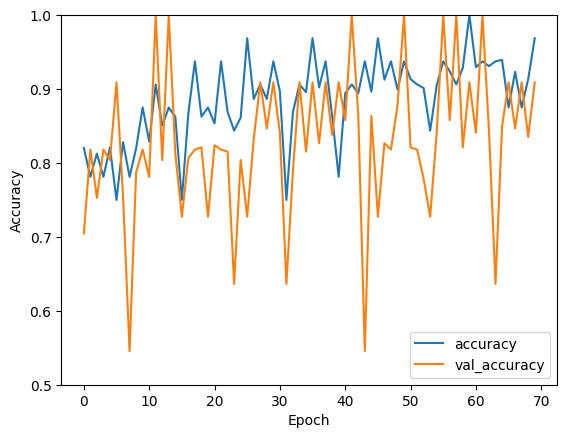

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_dataset)